<a href="https://colab.research.google.com/github/SidorencuOanaAlexandra/Artificial-Intelligence/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

     |████████████████████████████████| 276kB 7.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44091 sha256=137c804561b897a7841ba2caf4edb3c539f22a9662d599d13fc1762f25634921
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.8.1+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


In [4]:

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
aa

In [5]:
!unzip microcontroller_segmentation_data.zip
!ls

Archive:  microcontroller_segmentation_data.zip
   creating: microcontroller_segmentation_data/
   creating: microcontroller_segmentation_data/Microcontroller Segmentation/
   creating: microcontroller_segmentation_data/Microcontroller Segmentation/test/
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00081.jpg  
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00081.json  
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00082.jpg  
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00082.json  
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00083.jpg  
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00083.json  
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00084.jpg  
  inflating: microcontroller_segmentation_data/Microcontroller Segmentation/t

In [7]:
import os
import numpy as np
import json
from detectron2.structures import BoxMode

def get_microcontroller_dicts(directory):
    classes = ['pole','platform','track-sign-front','track-signal-front','track-signal-back']
    dataset_dicts = []
    for idx, filename in enumerate([file for file in os.listdir(directory) if file.endswith('.json')]):
        json_file = os.path.join(directory, filename)
        with open(json_file) as f:
            img_anns = json.load(f)
           

        record = {}

    
        
        filename = os.path.join(directory, img_anns["imagiPath"])
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = 1080
        record["width"] = 1920
      
        annos = img_anns["shapes"]
        objs = []
        for anno in annos:
            # if anno['shape_type']=="boundingbox":
            #   px = [anno['points'][0],anno['points'][2]]
            #   py = [anno['points'][1],anno['points'][3]]
            # else:
            px = [a[0] for a in anno['points']]
            py = [a[1] for a in anno['points']]
            poly = [(x, y) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": classes.index(anno['label']),
                "iscrowd": 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts



In [8]:
from detectron2.data import DatasetCatalog, MetadataCatalog
for d in ["train", "test"]:
    DatasetCatalog.register("microcontroller_" + d, lambda d=d: get_microcontroller_dicts('/content/microcontroller_segmentation_data/Microcontroller Segmentation/' + d))
    MetadataCatalog.get("microcontroller_" + d).set(thing_classes=['pole','platform','track-sign-front','track-signal-front','track-signal-back'])
#microcontroller_metadata = MetadataCatalog.get("microcontroller_train")
microcontroller_metadata = MetadataCatalog.get("microcontroller_train")

In [ ]:
MetadataCatalog.remove("microcontroller_test")



KeyError: ignored

In [ ]:

DatasetCatalog.remove("microcontroller_test")

In [9]:
 from google.colab.patches import cv2_imshow
import cv2

In [10]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

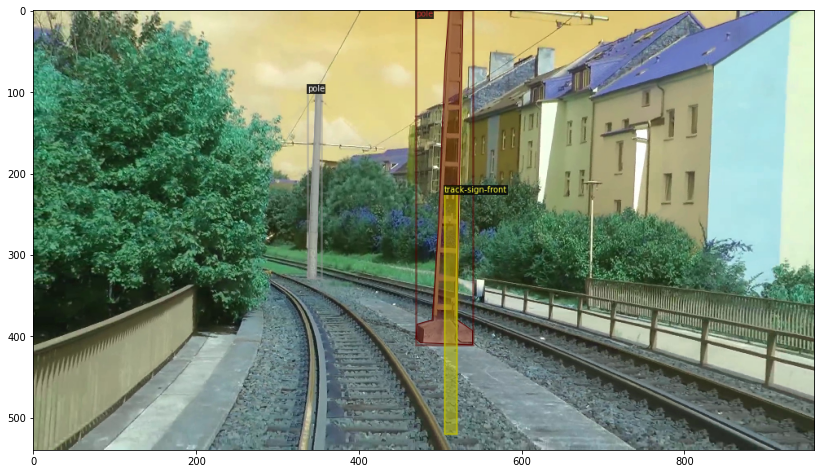

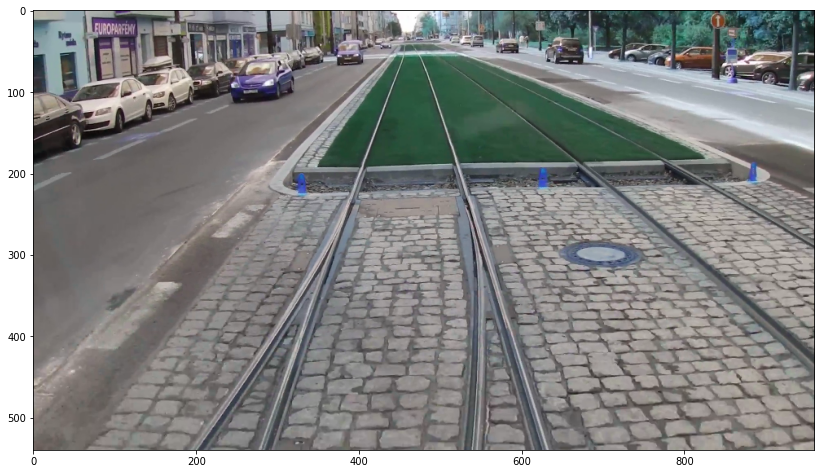

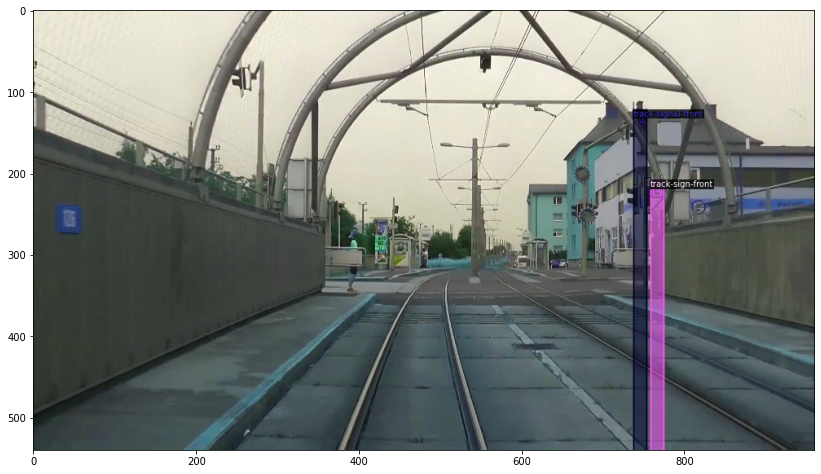

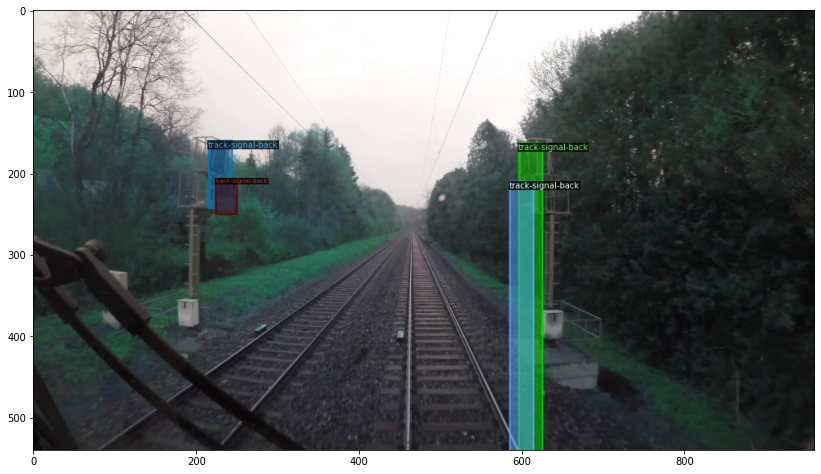

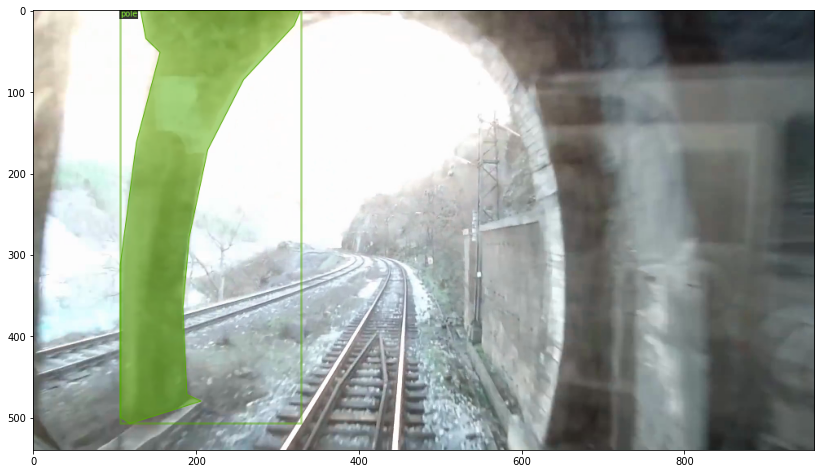

In [12]:
import random

dataset_dicts = get_microcontroller_dicts("/content/microcontroller_segmentation_data/Microcontroller Segmentation/train")
for d in random.sample(dataset_dicts, 7):
    #img = cv2.imread(d["file_name"], cv2.IMREAD_UNCHANGED)
     f = d["file_name"]
    #  f = f.split('/')
    #  ss = ""
    #  for i in range(1,len(f)-1):
    #    ss+="/"+f[i]
    #  nume_img = f[len(f)-1]
    #  print(nume_img)
    #  ss+="/"
    #  for i in range(len(nume_img)-3):
    #    ss+=nume_img[i]
    #  ss+='.jpg'
    #  print(ss)
     image = io.imread(f) 
     image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
     final_frame = cv.hconcat((image, image_2))
     v = Visualizer(image[:, :, ::-1], metadata=microcontroller_metadata, scale=0.5)
     v = v.draw_dataset_dict(d)
     plt.figure(figsize = (14, 10))
     plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
     plt.show()

In [13]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

In [15]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("microcontroller_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/03 11:17:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (6, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (6,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (20, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (20,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (5, 256, 1, 1) 

[06/03 11:17:30 d2.engine.train_loop]: Starting training from iteration 0
[06/03 11:17:41 d2.utils.events]:  eta: 0:08:54  iter: 19  total_loss: 5.799  loss_cls: 1.586  loss_box_reg: 0.01053  loss_mask: 0.6937  loss_rpn_cls: 2.664  loss_rpn_loc: 0.8885  time: 0.5389  data_time: 0.0220  lr: 4.9953e-06  max_mem: 4759M
[06/03 11:17:52 d2.utils.events]:  eta: 0:08:43  iter: 39  total_loss: 4.817  loss_cls: 1.441  loss_box_reg: 0.01405  loss_mask: 0.6918  loss_rpn_cls: 1.878  loss_rpn_loc: 0.785  time: 0.5392  data_time: 0.0069  lr: 9.9902e-06  max_mem: 4759M
[06/03 11:18:02 d2.utils.events]:  eta: 0:08:31  iter: 59  total_loss: 4.275  loss_cls: 1.148  loss_box_reg: 0.01822  loss_mask: 0.6868  loss_rpn_cls: 1.489  loss_rpn_loc: 0.8519  time: 0.5363  data_time: 0.0062  lr: 1.4985e-05  max_mem: 4759M
[06/03 11:18:13 d2.utils.events]:  eta: 0:08:22  iter: 79  total_loss: 3.028  loss_cls: 0.8477  loss_box_reg: 0.02209  loss_mask: 0.6809  loss_rpn_cls: 0.8168  loss_rpn_loc: 0.7815  time: 0.5400 

In [16]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("microcontroller_test", )
predictor = DefaultPredictor(cfg)

In [17]:
from detectron2.utils.visualizer import ColorMode

/content/microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00092.jpg
/content/microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00091.jpg
/content/microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00086.jpg
/content/microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00097.jpg
/content/microcontroller_segmentation_data/Microcontroller Segmentation/test/rs00089.jpg


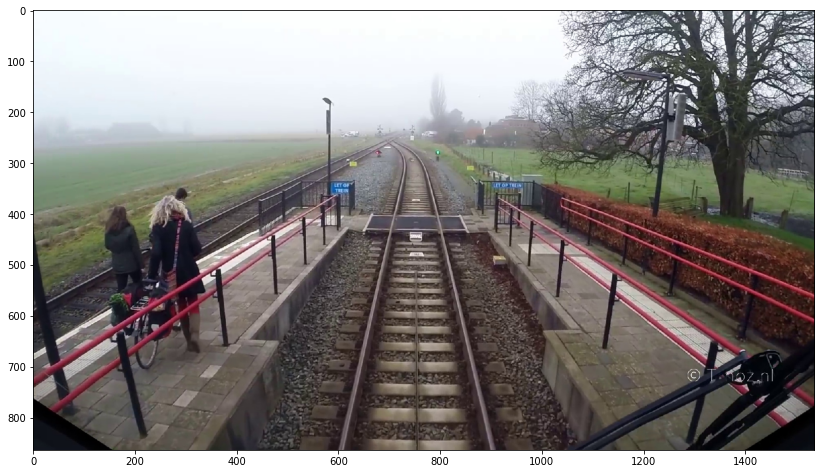

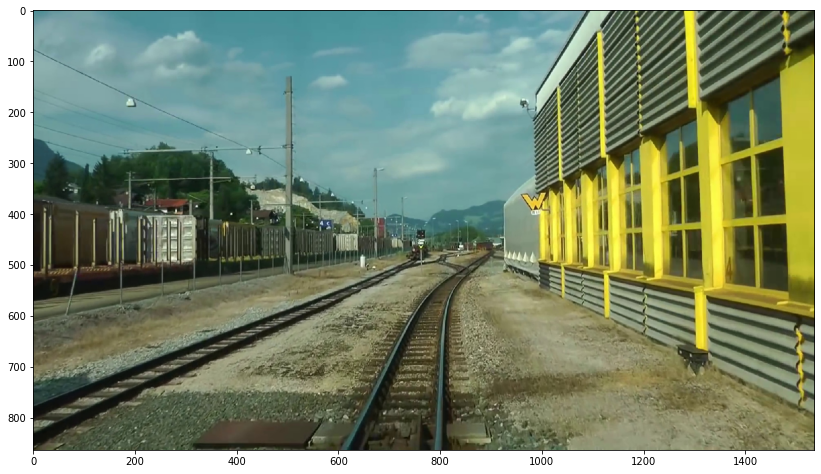

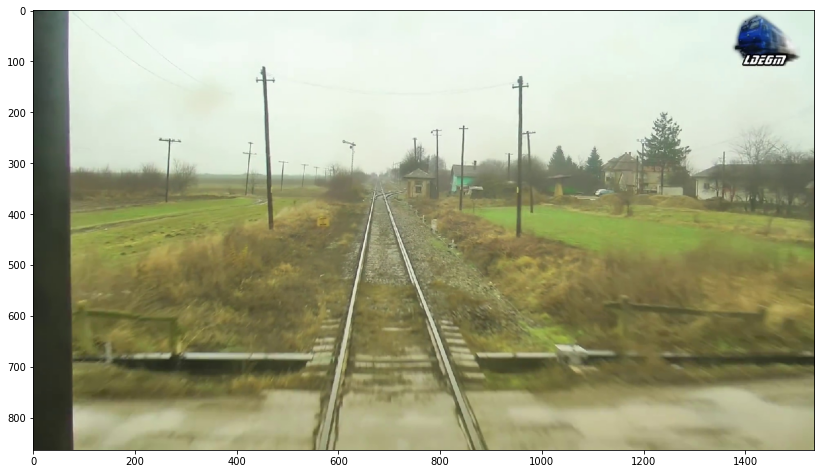

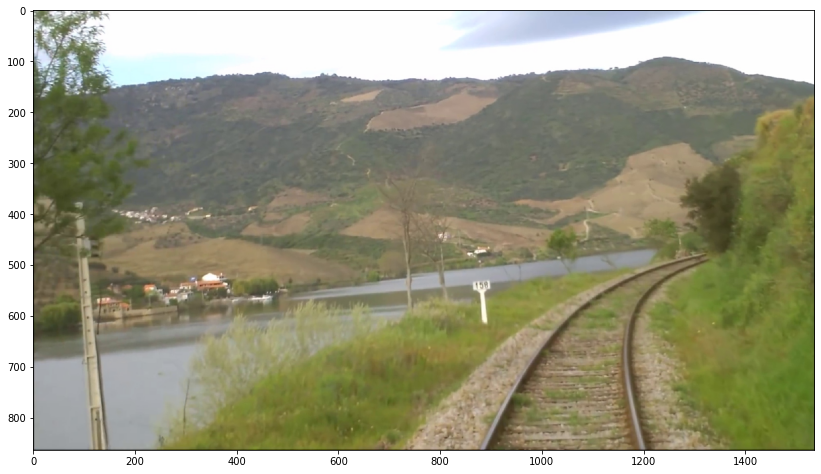

In [20]:
dataset_dicts = get_microcontroller_dicts('/content/microcontroller_segmentation_data/Microcontroller Segmentation/test')
for d in random.sample(dataset_dicts,5):    
    im = cv2.imread(d["file_name"])
    print(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=microcontroller_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))